In [1]:
import pandas as pd

###`Q-1:` Write a program to create an empty series.

In [3]:
# code here
empty_series = pd.Series(dtype=float)
empty_series

Series([], dtype: float64)

###`Q-2:` Write a Pandas program to add, subtract, multiple and divide two Pandas Series.

In [7]:
# code here
def series_operations(series1, series2, operation):
    if operation == "add":
        return series1 + series2
    elif operation == "subtract":
        return series1 - series2
    elif operation == "multiply":
        return series1 * series2
    elif operation == "divide":
        return series1 / series2
    else:
        return "Enter a valid operation"

s1 = pd.Series([1,2,3])
s2 = pd.Series([2,3,4])
series_operations(s1,s2, "add")

0    3.0
1    5.0
2    7.0
3    NaN
dtype: float64

###`Q-3` Write a Pandas program to compare the elements of the two Pandas Series.
Sample Series: [2, 4, 6, 8, 10], [1, 3, 5, 7, 10]



In [8]:
# code here
s1 = pd.Series([2,4,6,8,10])
s2 = pd.Series([1,3,5,7,10])
print(s1>s2)

0     True
1     True
2     True
3     True
4    False
dtype: bool


###`Q-5.`Write a function to change the data type of given a column or a Series. Function takes series and data type as input, returns the converted series.
```
series = pd.Series([1,2,'Python', 2.0, True, 100])
change to float type data
```
Note: Read about pd.to_numeric()

In [ ]:
# code here
s1 = pd.Series([1,2, 2.0, True, 100])
pd.to_numeric(s1)

Download data - https://drive.google.com/file/d/1LRhXwbEodeWXtzPhJCX0X9Lf_BECzvqb/view?usp=share_link
All Batsman runs series in IPL 2008 to 2022.

Below questions are based on this data.

###`Q-6` Find top 10 most run getter from the series.

In [24]:
# code here
batsman = pd.read_csv("/content/batsman_runs_series.csv")
batsman_series = pd.Series(batsman["batsman_run"])
batsman_series.index = batsman["batter"]
batsman_series

batter
A Ashish Reddy     280
A Badoni           161
A Chandila           4
A Chopra            53
A Choudhary         25
                  ... 
Yash Dayal           0
Yashpal Singh       47
Younis Khan          3
Yuvraj Singh      2754
Z Khan             117
Name: batsman_run, Length: 605, dtype: int64

In [28]:
batsman_series.sort_values(ascending=False).head(10)

batter
V Kohli           6634
S Dhawan          6244
DA Warner         5883
RG Sharma         5881
SK Raina          5536
AB de Villiers    5181
CH Gayle          4997
MS Dhoni          4978
RV Uthappa        4954
KD Karthik        4377
Name: batsman_run, dtype: int64

###`Q-7` No of players having runs above 3000

In [32]:
# code here
len(batsman_series[batsman_series.values>3000])

20

###`Q-8` No of players having runs above mean value?

In [34]:
# code here
len(batsman_series[batsman_series.values > batsman_series.values.mean()])

128

Download data - https://drive.google.com/file/d/1QZuZ5bypUInfVvarHACLAi8tXXHvb8xd/view?usp=share_link

file name - items.csv



###`Q-9`
    i. Read `items.csv` making `item_name` as index.
    ii. Show no of nan values
    ii. Item price is given in $, so convert it to rupees without currency symbol.
    iii. Make data type of newly made series as float.
    iv. Fill nan with mean of the series


How csv file looks

```
item_name	item_price
Chips and Fresh Tomato Salsa	$2.39
Izze	$3.39
Nantucket Nectar	$3.39
Chips and Tomatillo-Green Chili Salsa	$2.39
Chicken Bowl	$16.98

```

In [66]:
# code here
items = pd.read_csv("/content/items (1).csv", index_col="item_name").squeeze("columns")
items

item_name
Chips and Fresh Tomato Salsa              $2.39 
Izze                                      $3.39 
Nantucket Nectar                          $3.39 
Chips and Tomatillo-Green Chili Salsa     $2.39 
Chicken Bowl                             $16.98 
                                          ...   
Steak Burrito                            $11.75 
Steak Burrito                            $11.75 
Chicken Salad Bowl                       $11.25 
Chicken Salad Bowl                        $8.75 
Chicken Salad Bowl                        $8.75 
Name: item_price, Length: 4622, dtype: object

In [67]:
# number of nan values
items.isna().sum()

50

In [47]:
import numpy as np

In [78]:
items = items.fillna(np.nan)
items= items.str.replace("$","")

<ipython-input-78-5aaa5a3c51ca>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  items= items.str.replace("$","")


In [80]:
def fix_price(price):
  if not price == np.nan:
    return float(price) * 83
  else:
    return np.nan

items = items.apply(fix_price)

In [82]:
# fill na values iwth mean
items.fillna(items.mean(), inplace=True)

In [83]:
# number of null values after imputation
items.isna().sum()

0

###`Q-10`:
    i. Find mean price
    ii. Find 30th and 6th percentile value
    iii. Plot Histogram on price with bin size 50
    iv. No of items price lies between [1000 to 2000]



In [84]:
# code here

# mean price
items.mean()

619.4316141732284

In [91]:
percentile_30, percentile_60 = np.percentile(items, [30,60])
print(f"30th percentile: {percentile_30}")
print(f"60th percentile: {percentile_60}")

30th percentile: 369.35
60th percentile: 726.25


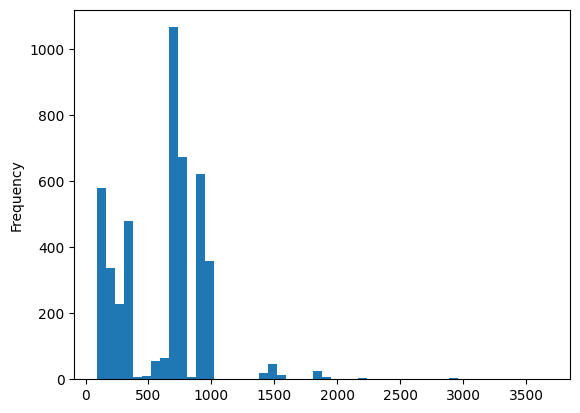

In [93]:
items.plot(kind="hist", bins=50);

In [97]:
items[(items>=1000) & (items<=2000)].shape[0]

116

In [ ]:
b